# Prediction heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build  a machine learning model capable of predicting  whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

|<img src="images/ml101-6-step-ml-framework.png" width=800>|
|:--:|
| 6 Step Machine Learning Modelling Framework|

To work through these topics, we'll use panda, Matplotlib and Numpy for data analysis, as well as, Scikit-Learn for machine learning and modelling tasks.

|<img src="images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500>|
|:--:|
| Tools which can be used for each step of machine learning modelling process. |

## 1.Problem Definatin

In a statement.
>Given clinical parameters about a patient, can we predict wheather or not they have a heart disease?

## 2.Data

The orginal data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle:https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3.Evaluation

> If we can reach %95 accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll purse the project.

## 4.Features

This is where you'll get different information about each of the feature in our data. ,

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
    - can range from mild symptoms to severe problems
    - signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
    - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [151]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting liblaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots appear inside the notebook
%matplotlib inline

# Model from skilearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


## Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.
1. What question(s) are you triying to solve?
2. What kind of data do we have and how we treat different types?
3. What's the missing from the data and how do you deal with it?
4. Where are the outliers and why do you should care about them?
5. How can you add, change or remove features to get more out of your data?

In [10]:
# Let's find out how many of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

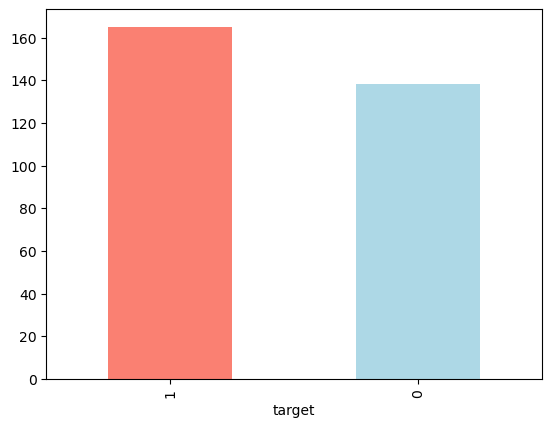

In [13]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Are there any missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency according Sex

In [38]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [39]:
# Compare target column with sex column
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


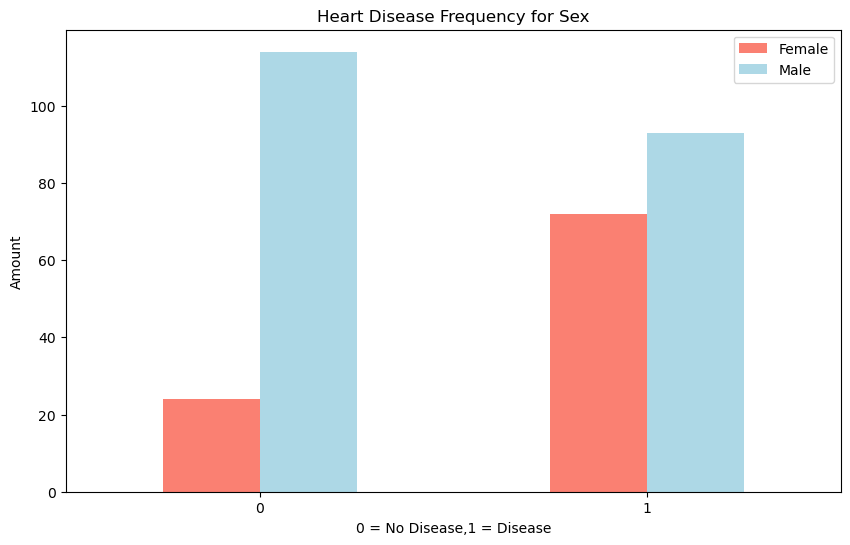

In [49]:
# Creat a plot of crosstab

pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease,1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

#### Age vs. Max Heart Rate for Heart Disease

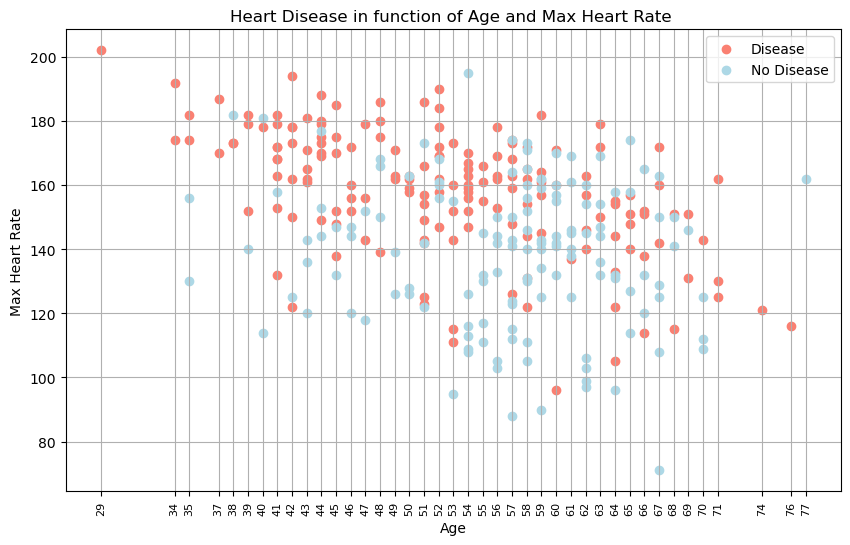

In [55]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df['age'][df['target'] == 1],
            df['thalach'][df['target'] == 1],
            c='salmon')

# Scatter with negative examples
plt.scatter(df['age'][df['target'] == 0],
            df['thalach'][df['target'] == 0],
            c='lightblue')

# Add some helpfull info
plt.title('Heart Disease in function of Age and Max Heart Rate ')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.xticks(np.array(df['age'].unique()), rotation=90, fontsize=8)
plt.grid()
plt.legend(['Disease','No Disease']);

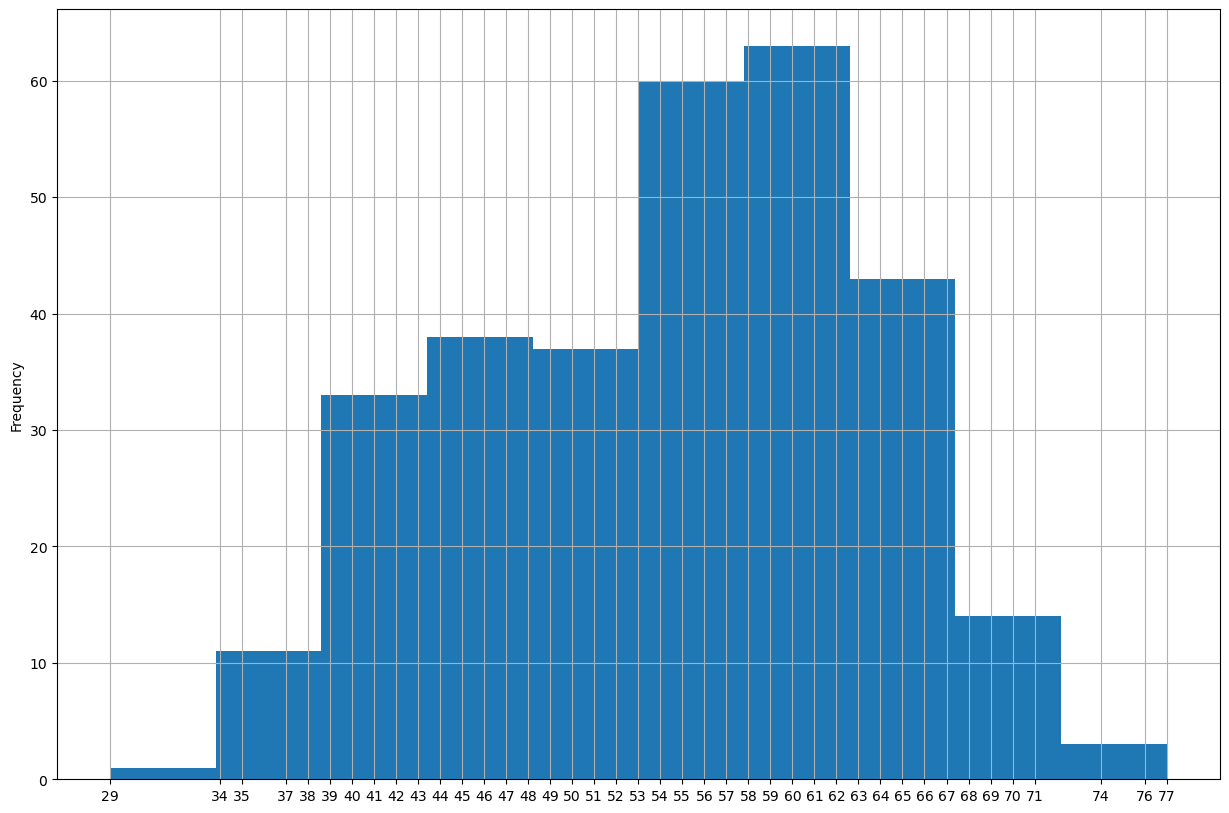

In [78]:
# Chech the distribution of the age column with a histogram
df['age'].plot.hist(figsize=(15,10),bins=10, grid=True, xticks=np.array(df['age'].unique()));

#### Harth Disease Frequency per Chest Pain Type 

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [80]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


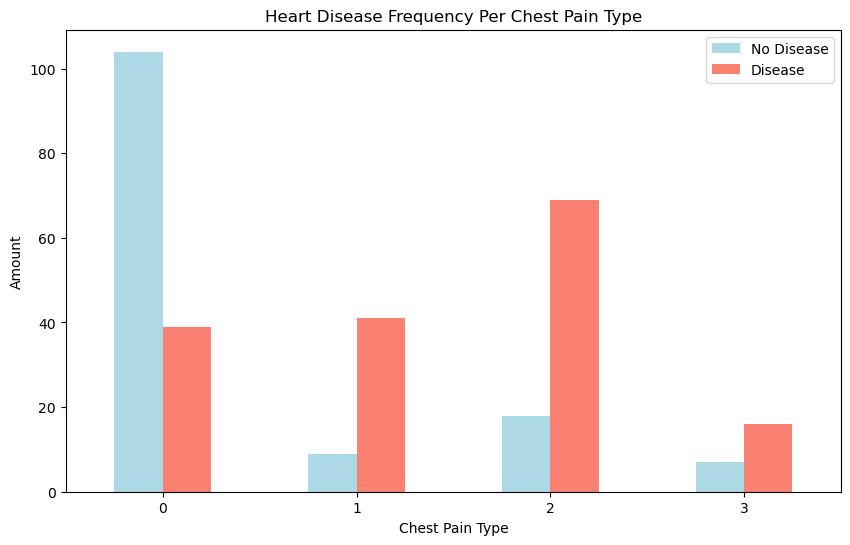

In [89]:
# Make the crosstab more visual
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['lightblue','salmon'])

# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [91]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


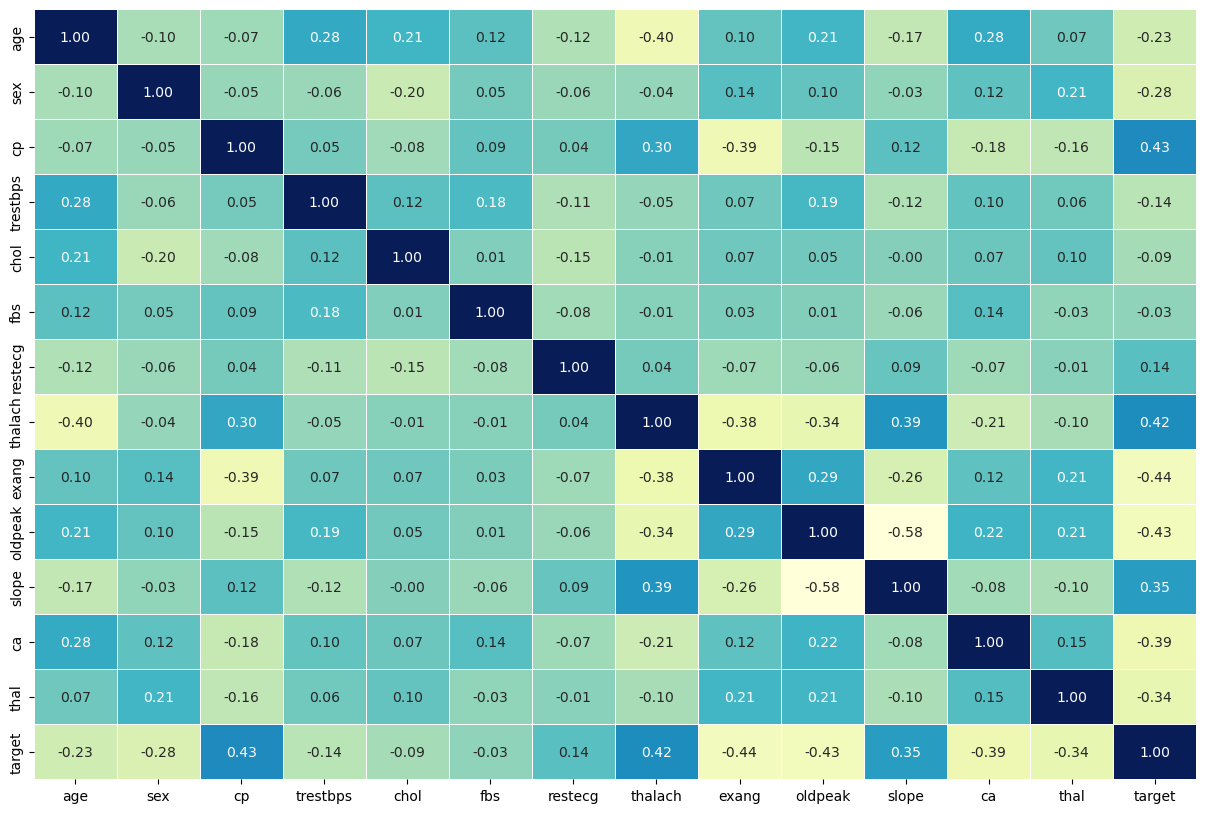

In [95]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu',
                 cbar=False
                 );

## 5. Modelling

In [97]:
# Split data into X and y
X = df.drop('target', axis=1)

y = df['target']

In [98]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [100]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [101]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [109]:
# Put model in a dictionary
models= {'Logistic Regression':LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Creat a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluates given mathine learning models.
    models: a dict of different Scikit-Learn machine learning models
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model score
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [111]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\Ercan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison 

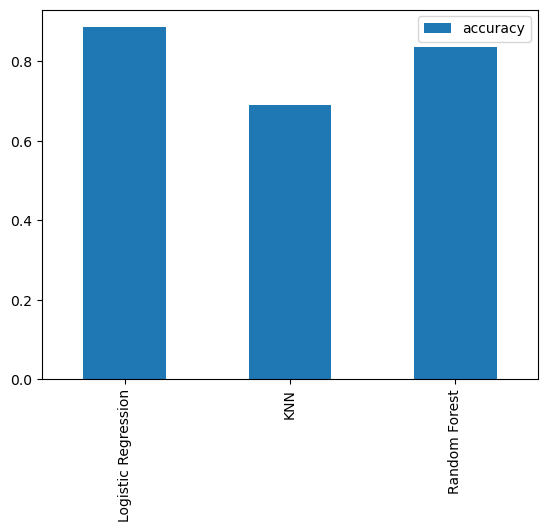

In [115]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model and we know model's frist predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importence
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification score
* ROC curve
* Area under ROC (AUC)

### Hyperparamater Tuning (by Hand)

In [118]:
# Let's tune KNN
train_score = []
test_score = []

# Create a list of different for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))

In [121]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [122]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

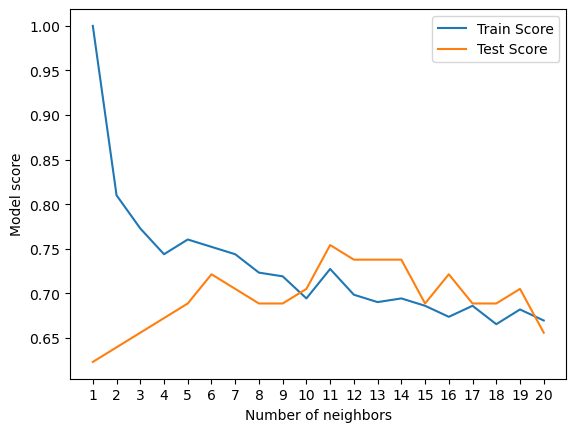

In [125]:
plt.plot(neighbors, train_score, label = 'Train Score')
plt.plot(neighbors, test_score, label = 'Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

In [133]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomSearchCV

In [129]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameters search for LogisticRegression
rs_log_grid = RandomizedSearchCV(LogisticRegression(),
                                 log_reg_grid,
                                 n_iter=20,
                                 cv=5,
                                 verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [130]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [132]:
rs_log_grid.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [135]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [136]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [137]:
# Evaluate the randonized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearcCV

In [139]:
# Different hyperparameter for our LogisticRegression model.
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver':['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [140]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [144]:
# Evaluate the grid search LogisticRegrassion model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## 4-Evaluating our tuning machine learning classifier, beyond accuracy

* ROC curve AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [145]:
# Make precision with tuned model
y_preds = gs_log_reg.predict(X_test)

In [146]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [147]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

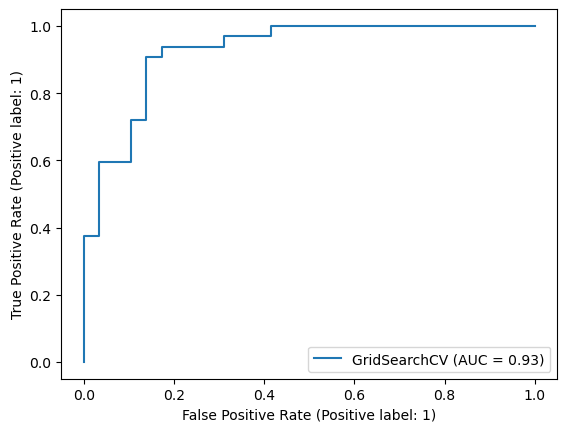

In [156]:
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                                 X=X_test,
                                 y=y_test)

### Confusion Matrix

Scikit-Learn allows us to creat a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted label.

Let's creat a function which uses Seaborn's `heatmap()` for doing so.

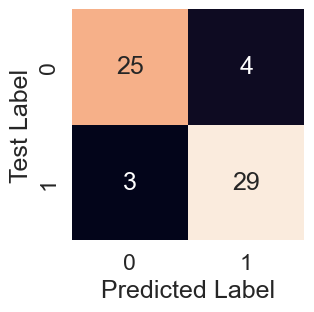

In [166]:
# Increase font size
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("Test Label")

plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve and AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [169]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cros_val_score()`

In [194]:
# Check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [195]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [197]:
# Cross validation accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [198]:
# Cross validation precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='precision')

cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [199]:
# Cross validation recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='recall')

cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [200]:
# Cross validation f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')

cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated calassification metrics'}>

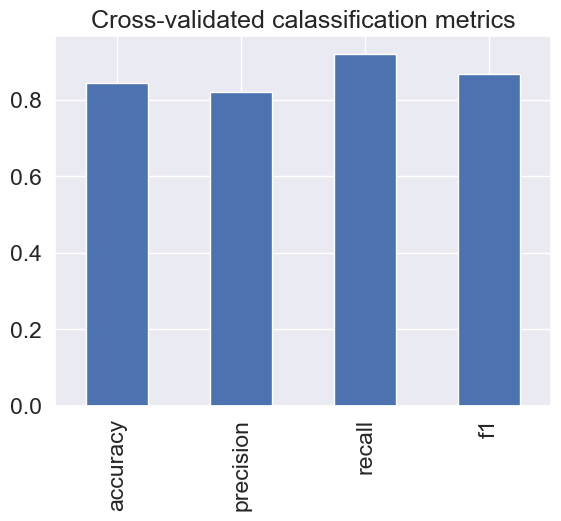

In [201]:
# Visualize cross-validation metrics
cv_metrics = pd.DataFrame({'accuracy':cv_acc,
                          'precision':cv_precision,
                          'recall':cv_recall,
                          'f1':cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title= 'Cross-validated calassification metrics', legend=False)

## 5- Feature Importance

Feature importace is another as asking, "which features contributed most to the outcomes of the model and how did they controbute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(Model Name) feature importance"

Let's find the feature importance for our LogisticRegression model.

In [202]:
# Fit and instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [203]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [204]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [207]:
# Match coef's of features to column
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

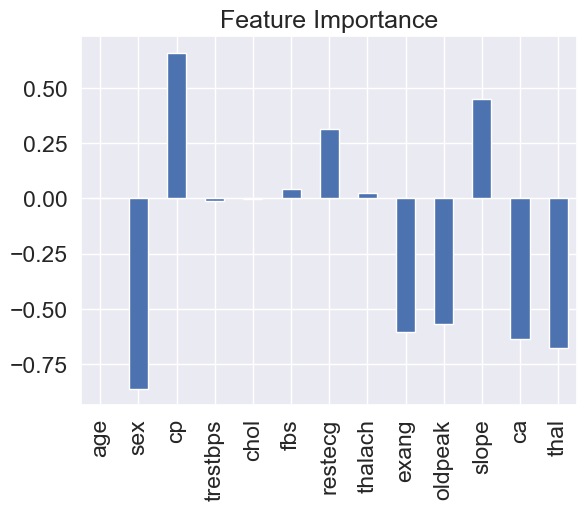

In [209]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= 'Feature Importance', legend=False);

## 6- Experimentation